In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('StudentsPerformance.csv')

### EDA

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Average score for males and females, group-wise

In [7]:
df.groupby('gender').mean()

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


### % of males scoring above 80 in math and 85 in reading group wise under [parental level of education as bachelor degree

In [8]:
# above 80 in math
df[(df['gender']=='male') & (df['parental level of education']=='bachelor\'s degree')][df['math score']>80].shape[0] / df[(df['gender']=='male') & (df['parental level of education']=='bachelor\'s degree')].shape[0] * 100

C:\Users\aniru\AppData\Local\Temp/ipykernel_12808/3676604903.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[(df['gender']=='male') & (df['parental level of education']=='bachelor\'s degree')][df['math score']>80].shape[0] / df[(df['gender']=='male') & (df['parental level of education']=='bachelor\'s degree')].shape[0] * 100


25.454545454545453

In [9]:
# above 85 in reading
len(df[(df['gender']=='male') & (df['parental level of education']=='bachelor\'s degree')][df['reading score']>85]) / len(df[(df['gender']=='male') & (df['parental level of education']=='bachelor\'s degree')]) * 100

C:\Users\aniru\AppData\Local\Temp/ipykernel_12808/2953196784.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(df[(df['gender']=='male') & (df['parental level of education']=='bachelor\'s degree')][df['reading score']>85]) / len(df[(df['gender']=='male') & (df['parental level of education']=='bachelor\'s degree')]) * 100


9.090909090909092

### count of males under group E that are either having parental level of education as high school or under bachelor degree program

In [10]:
df[(df['gender']=='male') & (df['race/ethnicity']=='group E') & (df['parental level of education'].isin(['high school','bachelor\'s degree']))].shape[0]

18

### Find the maximum marks for math, reading and writing for each group and plot them

In [11]:
maxs=df[['race/ethnicity','math score','reading score','writing score']].groupby('race/ethnicity', as_index=False).max()
maxs

,race/ethnicity,math score,reading score,writing score
0,group A,100,100,97
1,group B,97,97,96
2,group C,98,100,100
3,group D,100,100,100
4,group E,100,100,100


In [12]:
maxs_melted = maxs.melt('race/ethnicity', var_name='subject', value_name='max score')
maxs_melted

,race/ethnicity,subject,max score
0,group A,math score,100
1,group B,math score,97
2,group C,math score,98
3,group D,math score,100
4,group E,math score,100
5,group A,reading score,100
6,group B,reading score,97
7,group C,reading score,100
8,group D,reading score,100
9,group E,reading score,100


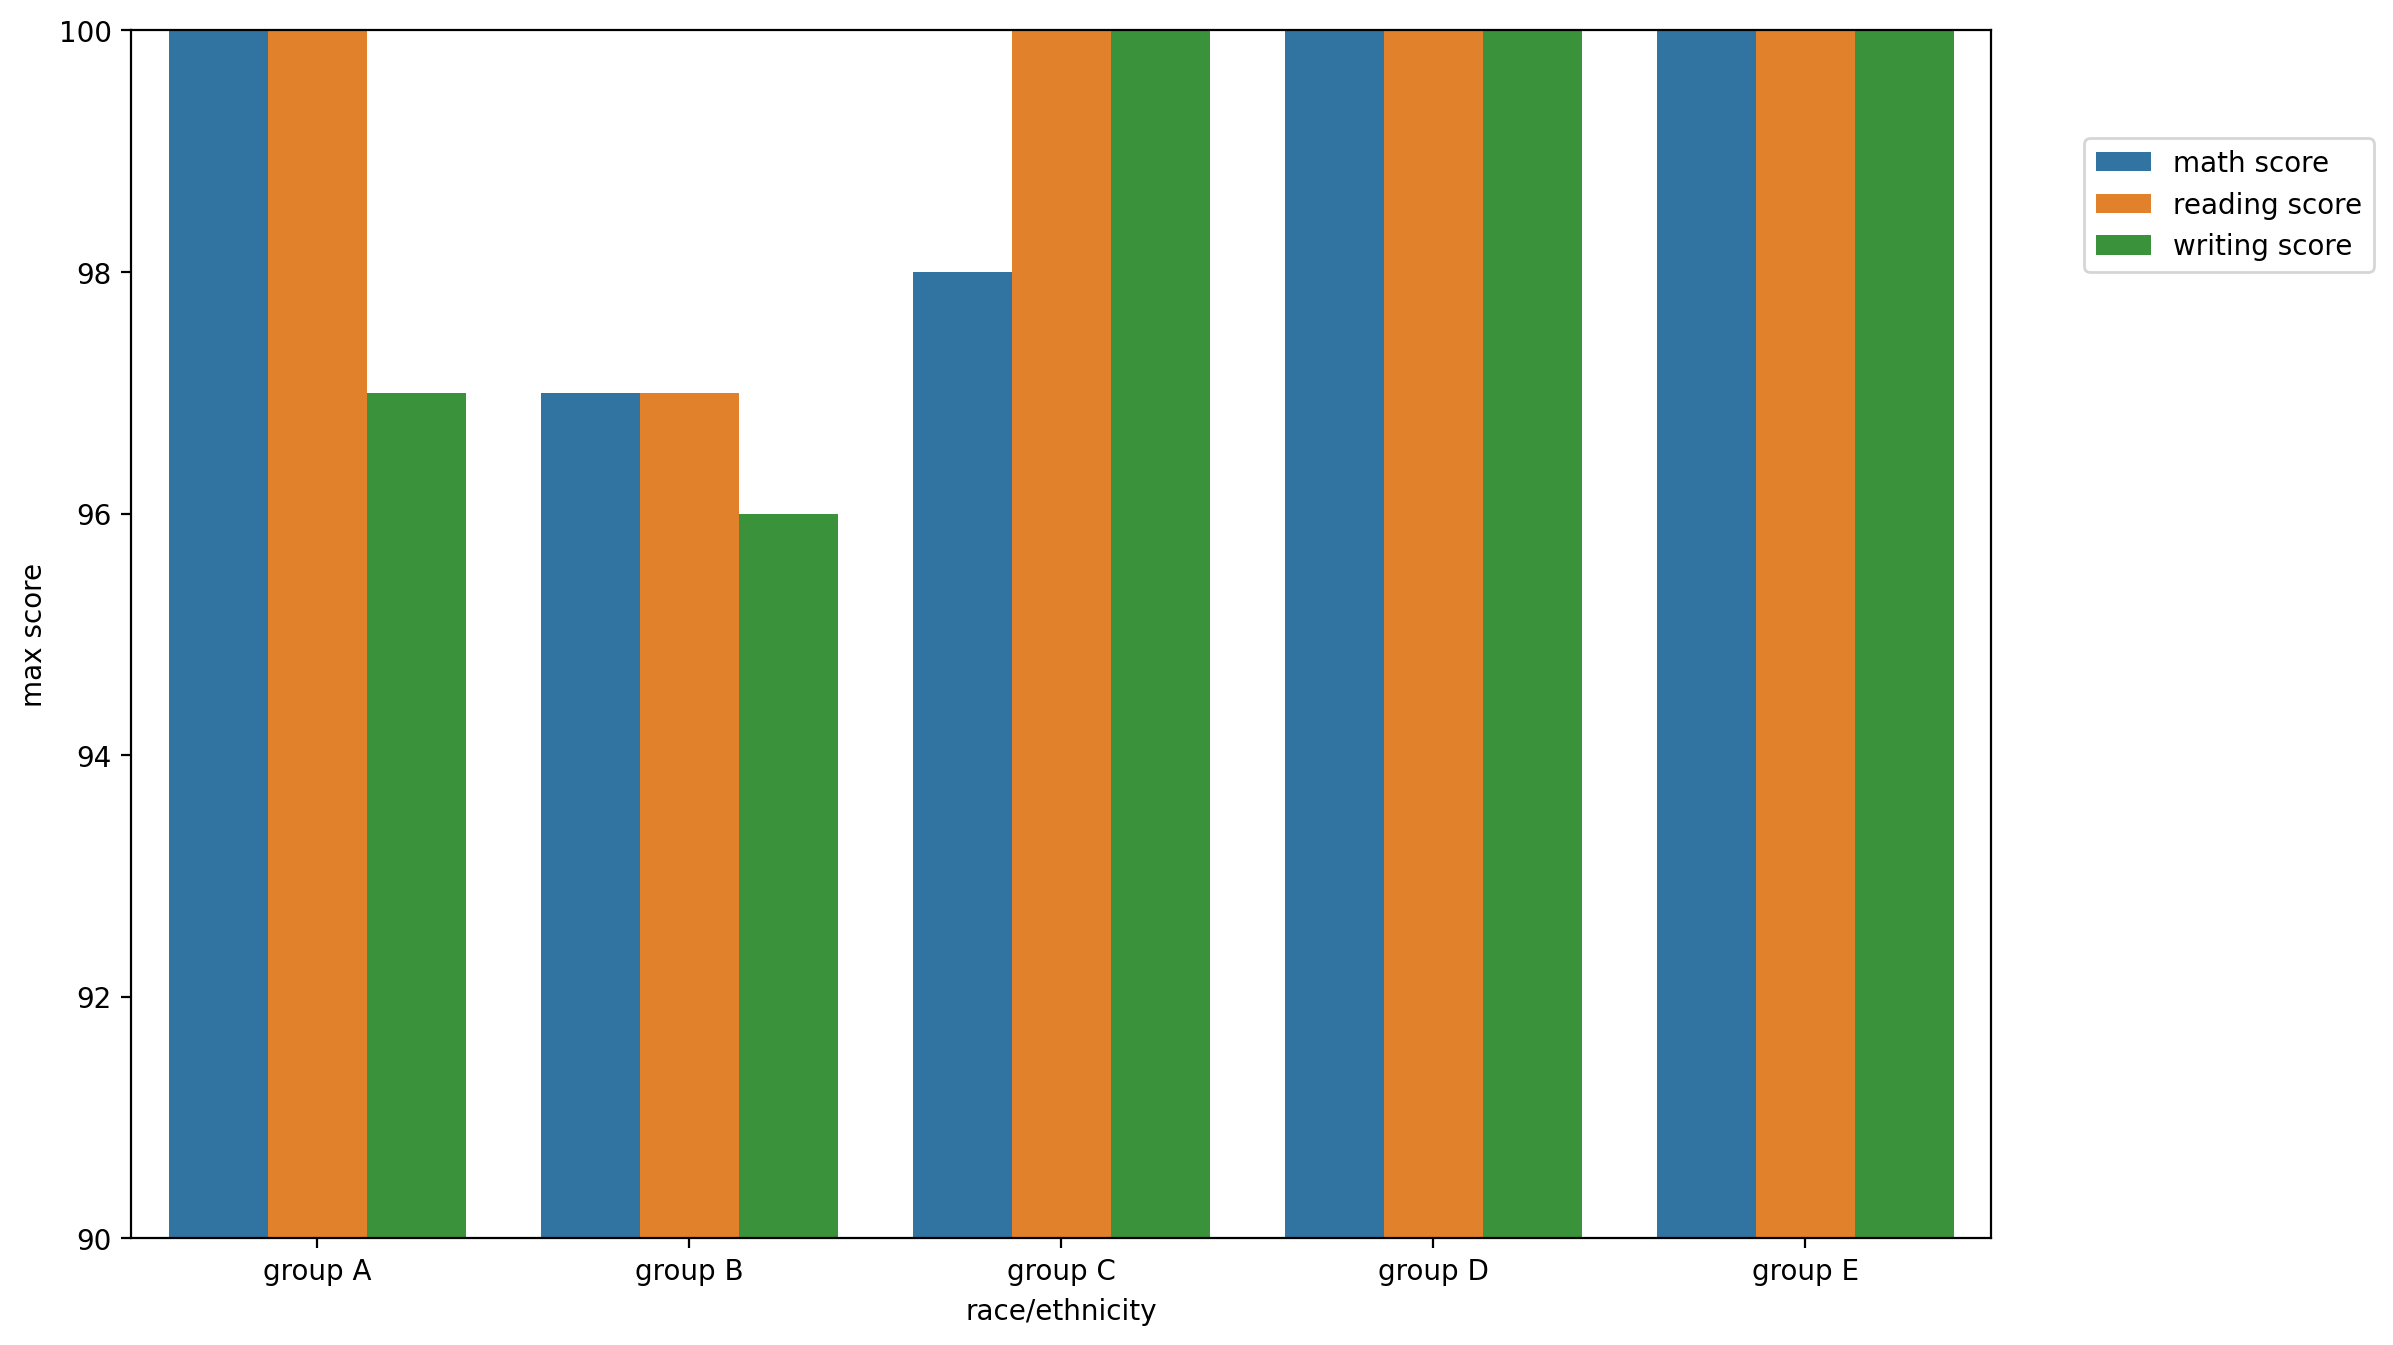

In [13]:
plt.figure(figsize=(12,8), dpi=200)
plt.ylim(90,100)
sns.barplot(data=maxs_melted, x='race/ethnicity', y='max score', hue='subject')
plt.legend(loc=(1.05,0.8))

### Plot the count of students based on their gender and whether they have prepared for the test or not

<AxesSubplot:xlabel='gender', ylabel='count'>

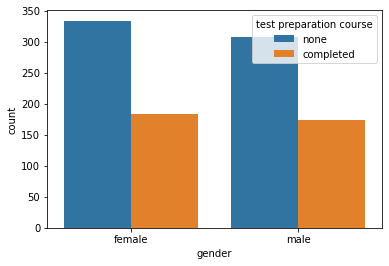

In [14]:
sns.countplot(data=df, x='gender', hue='test preparation course')

### Plot the scores in all three subjects based on their gender

In [15]:
# couldn't understand the statement

### Plot the relations between various columns based on the correlation coefficient

<AxesSubplot:>

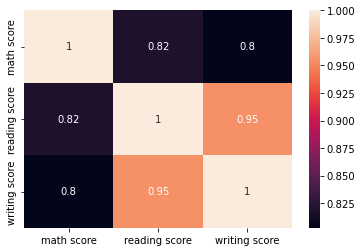

In [16]:
sns.heatmap(df.corr(), annot=True)

### Plot the scores of each student group wise and parental level of education

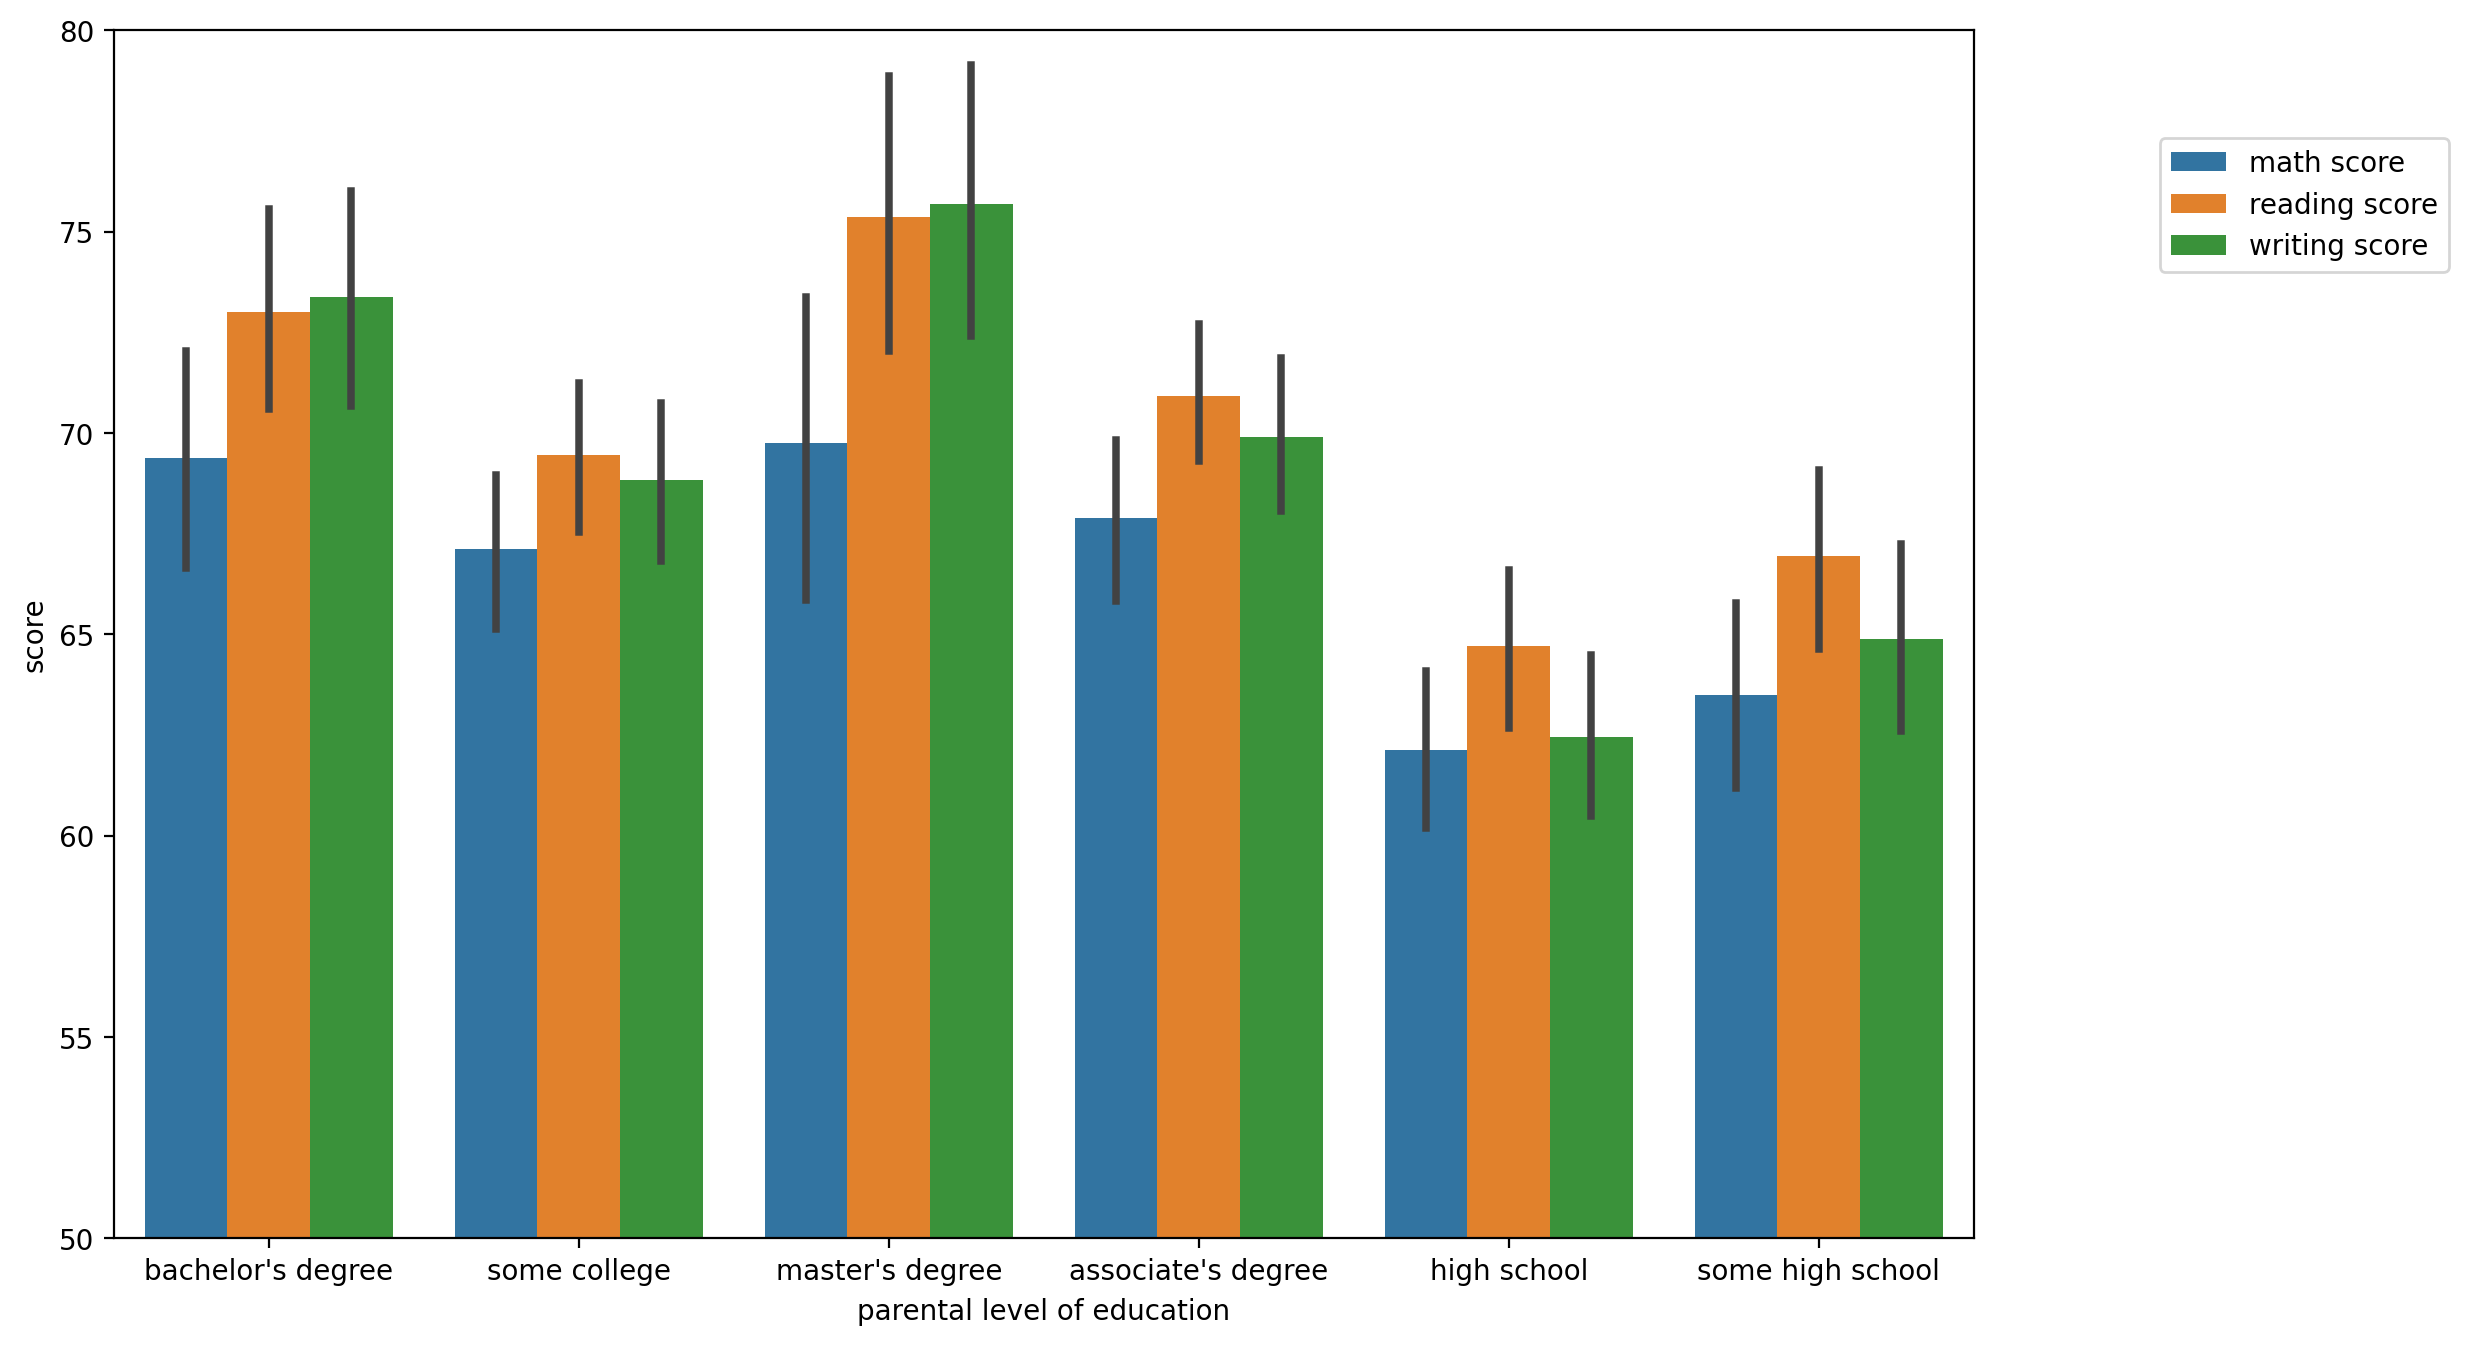

In [17]:
dfm=df[['parental level of education','math score','reading score','writing score']].melt('parental level of education', var_name='subject', value_name='score')

plt.figure(figsize=(12,8), dpi=200)
plt.ylim(50,80)
sns.barplot(data=dfm, x='parental level of education', hue='subject', y='score')
plt.legend(loc=(1.1,0.8))

### Plot the relation between marks and preparation that will help understand them properly

<AxesSubplot:xlabel='math score', ylabel='test preparation course'>

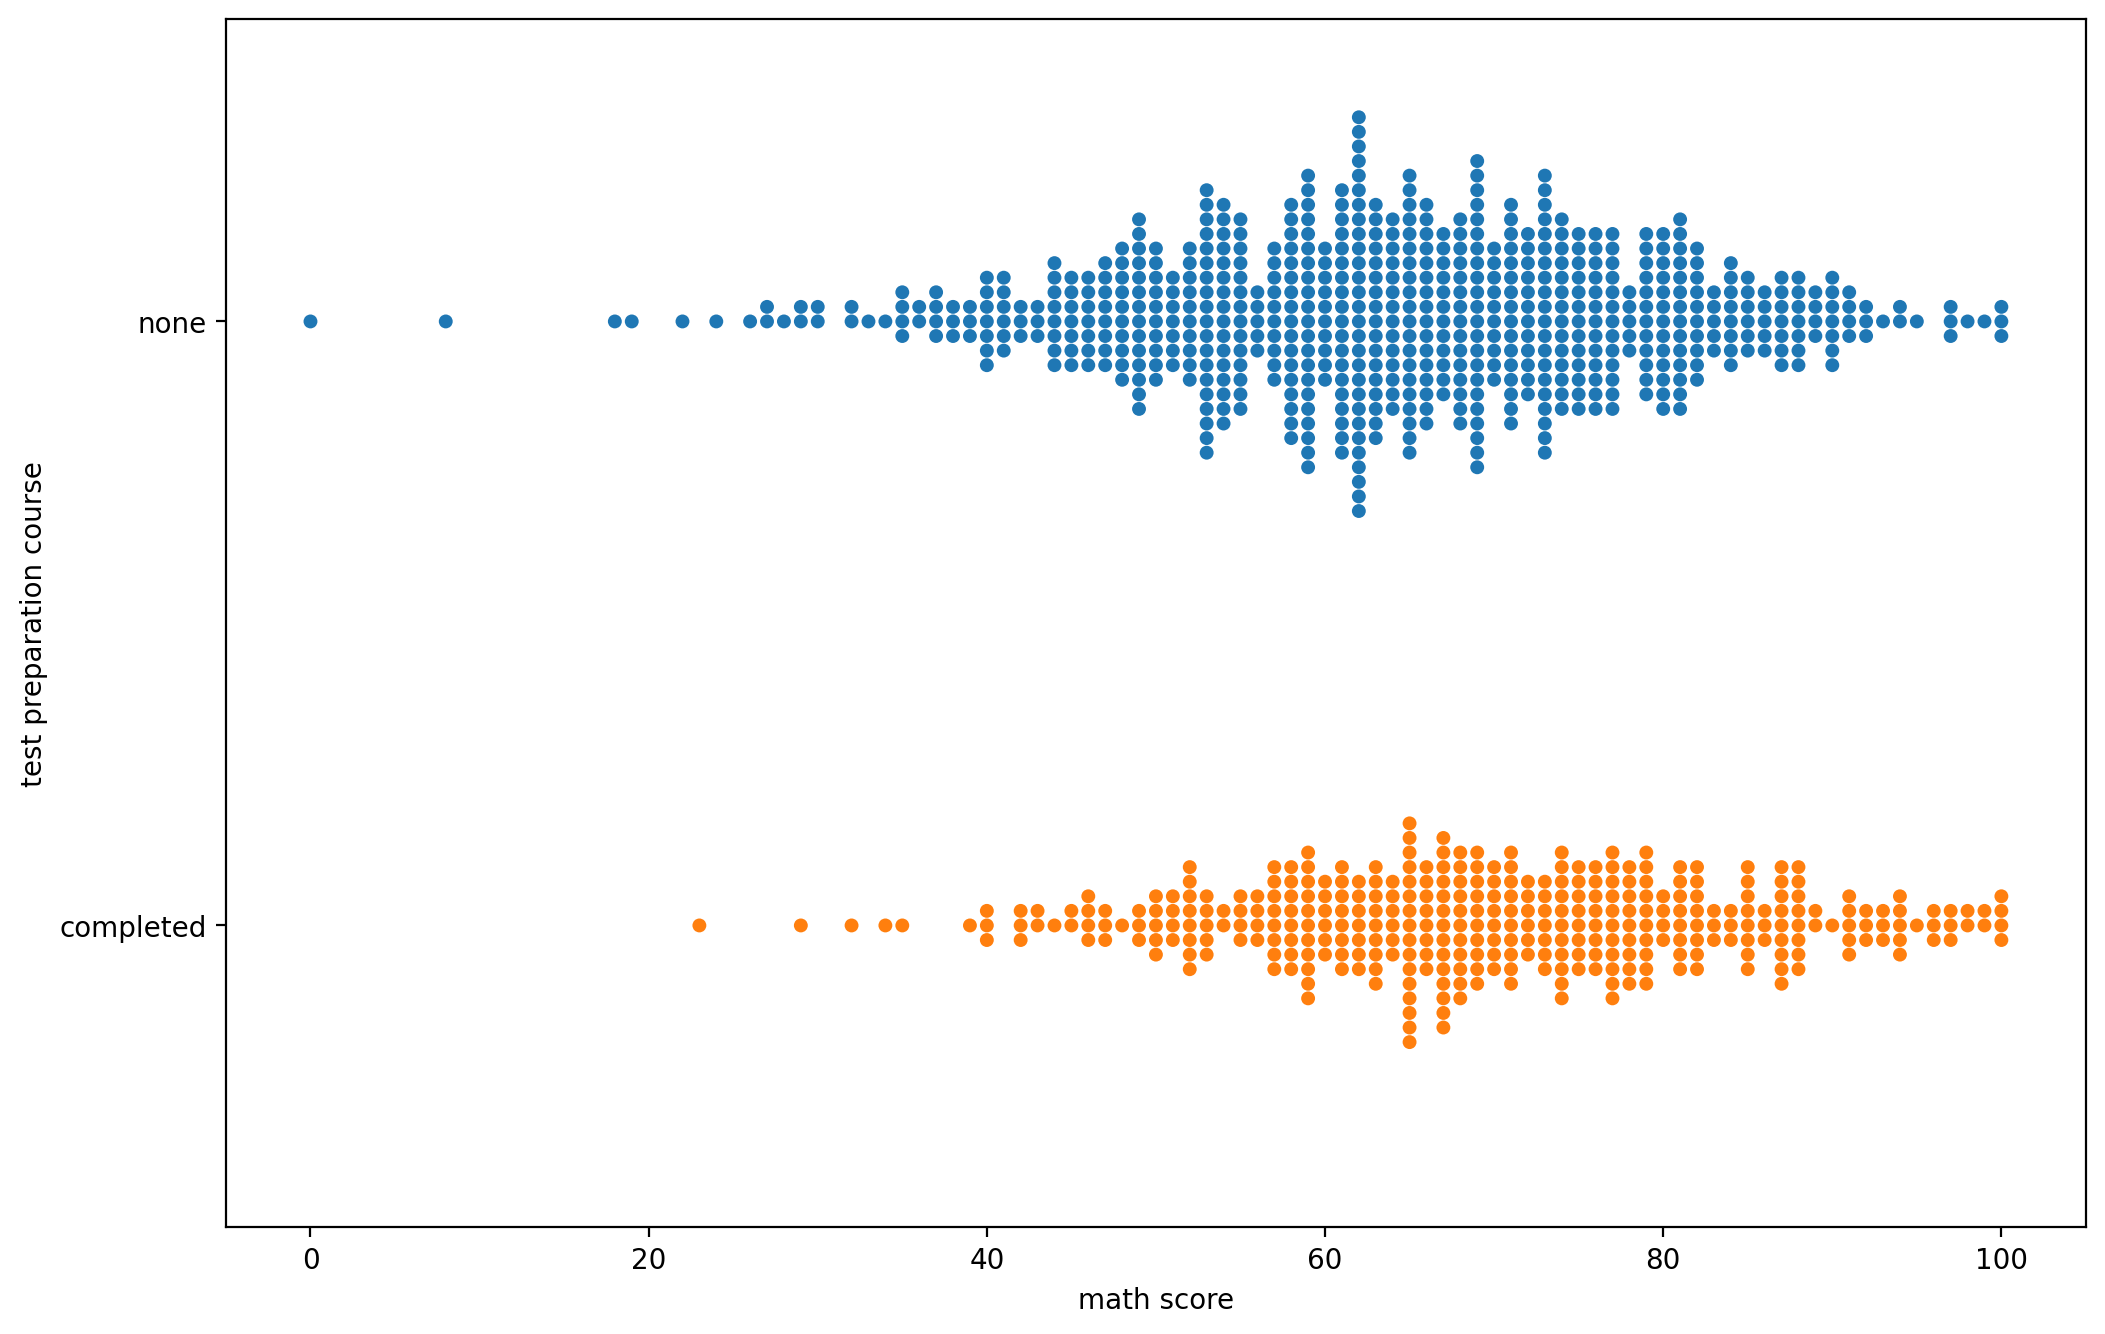

In [21]:
plt.figure(figsize=(12,8), dpi=200)
sns.swarmplot(data=df, x='math score', y='test preparation course')

### right/left skew

-0.27893514909431694


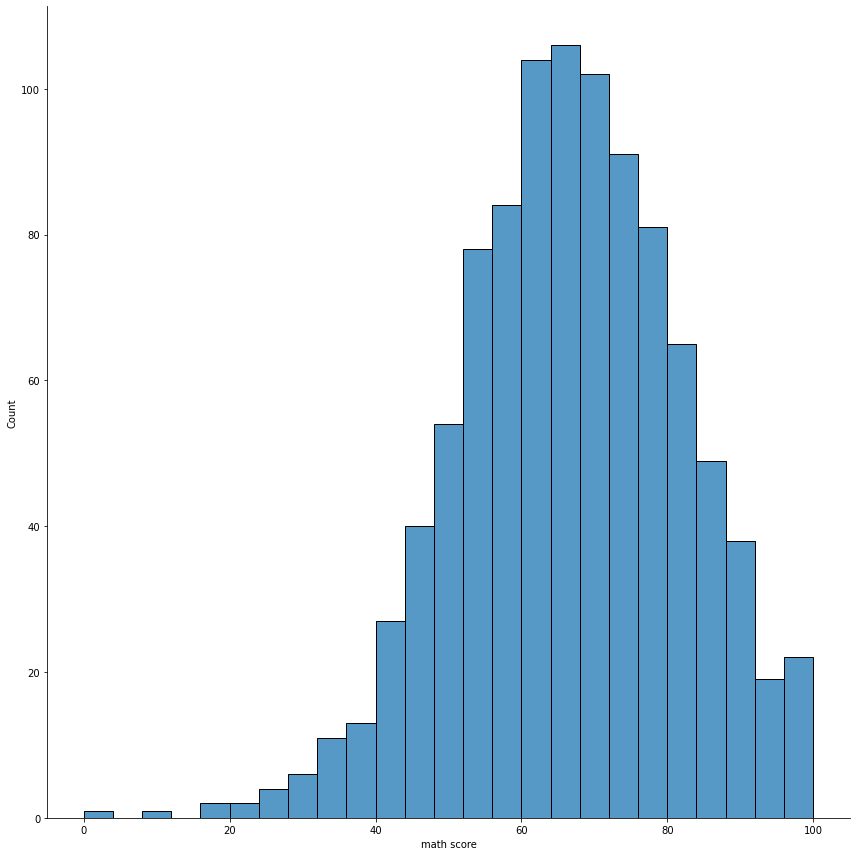

In [33]:
print(df['math score'].skew())
sns.displot(data=df, x='math score', height=12)
# left skew, can be seen in the plot too

-0.28944397150761897


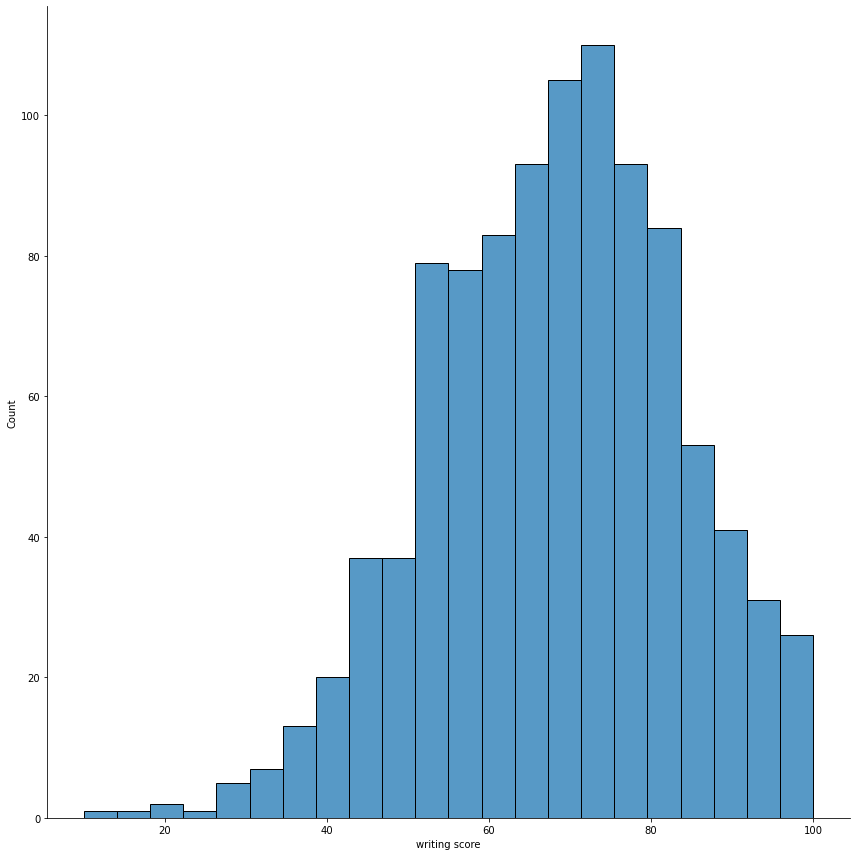

In [34]:
print(df['writing score'].skew())
sns.displot(data=df, x='writing score', height=12)
# left skew, can be seen in the plot too

-0.25910451810923063


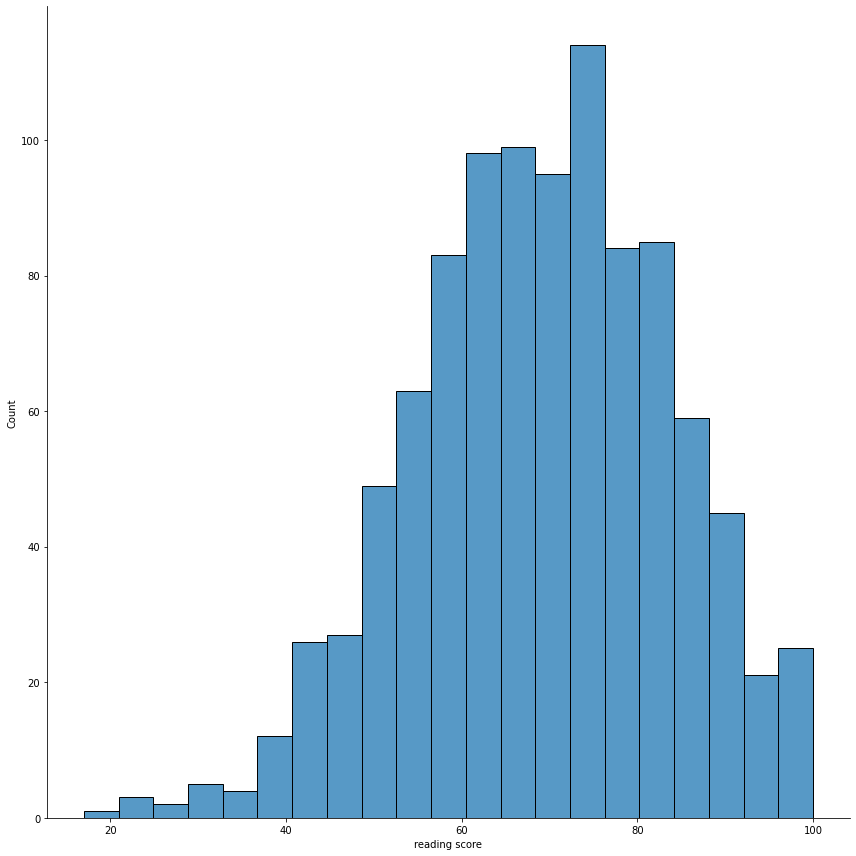

In [35]:
print(df['reading score'].skew())
sns.displot(data=df, x='reading score', height=12)
# left skew, can be seen in the plot too

### One hot encoding and ml prep

In [36]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [37]:
df_nums = df.select_dtypes(exclude='object')
df_objs = df.select_dtypes(include='object')

In [43]:
df_objs = pd.get_dummies(df_objs,drop_first=True)
final_df = pd.concat([df_nums,df_objs],axis=1)
final_df

,math score,reading score,writing score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,72,72,74,0,1,0,0,0,1,0,0,0,0,1,1
1,69,90,88,0,0,1,0,0,0,0,0,1,0,1,0
2,90,95,93,0,1,0,0,0,0,0,1,0,0,1,1
3,47,57,44,1,0,0,0,0,0,0,0,0,0,0,1
4,76,78,75,1,0,1,0,0,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,88,99,95,0,0,0,0,1,0,0,1,0,0,1,0
996,62,55,55,1,0,1,0,0,0,1,0,0,0,0,1
997,59,71,65,0,0,1,0,0,0,1,0,0,0,0,0
998,68,78,77,0,0,0,1,0,0,0,0,1,0,1,0
